# **Comparative analysis of FINBERT, BERT and traditional models of classification**

We are conducting a comaparative analysis of pretrained FINBERT, pretrained BERT and traditional models viz., logistic regression and support vector classification to find the best model for identifying and predicting the sentiment of text. 

The second file data.csv is the dataset of financial sentences with sentiment labels. It consists of 5842 sentences categorised by sentiment (positive, negative, and neutral). We follow the same steps as in the as in previous data files (data1_all.ipynb, data1_FINBERT.ipynb)  to examine the consistency of the model.

If the sentiment of the phrase is positive it means that an invester can consider investing in stock market, if negative then invester must refrain investing and if sentiment is neutral then further investigation is suggested.

In this notebook, we are training the FINBERT model. We have split the dataset into train, test and validation using stratified sampling. This can allows us to take representative of the sample in three datasets and compare results of this model with other models. 

In [ ]:
!pip uninstall transformers                       # installing libraries (TRANSFORMERS for BERT) 
!pip install --upgrade transformers==4.28.0
#note: when uninstalling existing transformers it may ask to answer y/n. Input response y to proceed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 99.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 120.6 MB/s eta 0:00:00


In [ ]:

!pip install numpy==1.19.5
!pip install torch==1.7.1
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 98.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
Failed to build numpy
ERROR: Could not build wheels for numpy, which is required to install pyproject.toml-based projects
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement torch==1.7.1 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1)
ERROR: No matching distribution

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 22.9 MB/s eta 0:00:00


**transformers**: This package provides an interface pretrained BERT and FINBERT models to perform sentiment analysis.  

**numpy**: It is a powerful tool to deal with data preprocessing, handling input arrays, multidimensional data and performs mathematical computations efficiently.

**torch**: Also known as PyTorch, is a open-source machine learning library. AS BERT and FINBERT models are built using deep learning architechture, PyTorch is commonly used in these models.

**scikit-learn**: provides tools and algorithms in machine learning and helps in tasks like data preprocessing, feature extraction, model evaluation, and classification and also offers convinient APIs.


**datsets**: The 'datasets' library is a Python package that provides an efficient way to work with various datasets, including text and image datasets. It provides a standardized interface for loading and processing datasets, making it easier to work with different datasets and models.

**Matplotlib**: It is a powerful library in Python used for data visualization. It provides a wide range of tools for creating graphs, plots, charts, and so on.

**Pyplot**: It is a collection of functions in the Matplotlib library. It enables the quick and easy creation of a number of plot types, including line plots, scatter plots, bar plots, and histograms.

**Seaborn**: It is a Python data visualization library based on Matplotlib. Seaborn provides a high-level interface for creating informative and attractive statistical graphics, and it is used to plot the histograms here.

**sklearn.model_selection**: The model_selection module in sklearn library provides several functions for model selection and evaluation.

**sklearn.metrics**: The sklearn.metrics module provides a suite of functions and utilities for evaluating the performance of machine learning models such as: accuracy_score, precision_score, recall_score.

**wordcloud**: It is a Python library used to generate word clouds, which are graphical representations of the most frequent words in a text corpus.

**nltk**: Also known as Natural Language Toolkit. It is a Python library used for working with human language data. It provides a suite of text processing libraries for tokenization, stemming, tagging, parsing, etc.


## Importing required libraries

In [ ]:
import numpy as np
import pandas as pd 
from transformers import BertTokenizer, Trainer, BertForSequenceClassification, TrainingArguments
from datasets import Dataset
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
torch.cuda.is_available()      # Check if a CUDA-capable GPU is available

True

## Importing and loading dataset

Function drive.mount() from *'drive'* package is used to gain access to google drive. A window pops on the screen which asks for users permission to gain access to drive. One must make sure they have their dataset uploaded on google drive in folder name 'BERT'.

In [ ]:
#Importing our dataset from google drive 
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive'
%pwd

Mounted at /content/gdrive
/content/gdrive/MyDrive


'/content/gdrive/MyDrive'

In [ ]:
%cd BERT

/content/gdrive/MyDrive/BERT


 Dataset is imported using pd.read_csv() function.

In [ ]:
df = pd.read_csv('data.csv')
pd.set_option('display.max_colwidth', None) #to enable viewer to read entire text in the column
df.head()

,Sentence,Sentiment
0,"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real possibility",negative
2,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",positive
3,"According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .",neutral
4,"The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .",neutral


## Preprocessing: Cleaning, removing stopwords, lemmatization

Next step is cleaning the data to make it suitable to load it in our models. This is an essential step as feeding raw data will not give us good results.

In the snippet below we creating an array 'possible_labels' that contains all unique values in the 'Sentiment' column of the DataFrame 'df

In [ ]:
#get unique values    
possible_labels = df.Sentiment.unique()  
possible_labels

array(['positive', 'negative', 'neutral'], dtype=object)

It is evident from output that we have three unique values: positive, negative and neutral

In [ ]:
# Creating an empty dictionary 'label_dict' to store the label-index pairs
label_dict = {}
for index, possible_label in enumerate(possible_labels):                # Iterating over each label in 'possible_labels' 
    if possible_label == 'neutral':
        label_dict[possible_label] = 0                                  # Adding the label-index pair to the 'label_dict' dictionary
                                        
    elif possible_label == 'negative':
        label_dict[possible_label] = 1
    elif possible_label == 'positive':
        label_dict[possible_label] = 2

Creating a new column 'label' in the DataFrame 'df' by replacing the categorical values in the 'Sentiment' column with their corresponding index values from the 'label_dict' dictionary

In [ ]:
#Creating column 'label'
df['label'] = df.Sentiment.replace(label_dict)  

In [ ]:
df      # labels for neutral is 0 , for negative is 1 , for positive is 2

,Sentence,Sentiment,label
0,"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",positive,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real possibility",negative,1
2,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",positive,2
3,"According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .",neutral,0
4,"The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .",neutral,0
...,...,...,...
5837,RISING costs have forced packaging producer Huhtamaki to axe 90 jobs at its Hampshire manufacturing plant .,negative,1
5838,Nordic Walking was first used as a summer training method by cross-country skiers .,neutral,0
5839,"According shipping company Viking Line , the EU decision will have a significant financial impact .",neutral,0
5840,"In the building and home improvement trade , sales decreased by 22.5 % to EUR 201.4 mn .",neutral,0


In the above three cells first we assign an interger value to each label to make it readable for the model. 
The label values are defined as follows: 
**neutral = 0 , negative = 1 , positive = 2**
A new column 'label' is added to dataset 'df' to assign label corresponding to the value in category column. 'label_dict' takes care of this pairing. 

In [ ]:
df = df.dropna(subset=['Sentence', 'label']) ## drop missing values

In [ ]:
# Converting % into percent
df['Sentence'] = df['Sentence'].str.replace('%', 'percent')

All the '%' symbols are now converted into text 'percent' using str.replace() function.

In [ ]:
import re
# Define a function to perform the conversion
def convert_usd(sentence):
    return re.sub(r'\$', 'usd ', sentence)

# Apply the function to the 'Sentence' column
df['Sentence'] = df['Sentence'].apply(convert_usd)

Since '$' represents currency US dollars we can convert it to 'usd' which is widely used. A function 'convert_usd' is defined to identify pattern using regular expression *r'\$'* and converted to 'usd' using 'apply()' function

In [ ]:
#identifying any html tags in the data
def has_html_tags(text):
    pattern = r"<[^>]+>"
    if re.search(pattern, text):
        return True
    else:
        return False

# Apply the function to the 'Sentence' column
html_tags = df['Sentence'].apply(has_html_tags)
rows_with_html_tags = df[html_tags == True]
print(rows_with_html_tags)


                                                               Sentence  \
4053  usd TSLA <STUDY the CHARTS> Pullback_Time https://t.co/ZMDG0fb3I7   

     Sentiment  label  
4053  negative      1  


Any html tags <> in the dataset are identified by defining has_html_tags function. re.search() function will search for pattern * r"<[^>]+>" * and then return True is pattern is identified else False. 

apply() function is used to check in 'sentence' column in dataset 'df' and these values are stored in rows_with_html_tags variable. 

Using print() we see that the dataframe to see rows having html tags


In [ ]:
#removing html tags from data
from bs4 import BeautifulSoup
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

df['Sentence'] = df['Sentence'].apply(strip_html)

<ipython-input-17-1c1500e2c156>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


To identify any URL's or web addresses (starting with "http://", "https://", or "www.")  in the dataframe we define function has_urls such that if re.search () function identifies pattern = r"\b(https?://|www\.)\S+\b" in the text it will return value True or False otherwise. 

apply() function is used to check any URL's in 'sentence' column in dataset 'df' and these values are stored in urls_present variable. 

print() function shows rows having URL's.

In [ ]:
# Define a function to check for URLs in a text
def has_urls(text):
    pattern = r"\b(https?://|www\.)\S+\b"
    if re.search(pattern, text):
        return True
    else:
        return False

# Apply the function to the 'Sentence' column
urls_present = df['Sentence'].apply(has_urls)

# Print the rows that contain URLs
print(df[urls_present])


                                                                                                                                                                                                                                                                       Sentence  \
11                                                                                                                    usd SAP Q1 disappoints as #software licenses down. Real problem? #Cloud growth trails usd MSFT usd ORCL usd GOOG usd CRM usd ADBE https://t.co/jNDphllzq5   
16                                                                                                                                                     usd MSFT SQL Server revenue grew double-digit with SQL Server Premium revenue growing over 30percent http://stks.co/ir2F   
26                                                                                                                                                                             

Now that URL's are identified in the data, we remove them by defining a function remove_between_square_brackets to identify the pattern and replacing it with empty string. URL's are effectively removed from 'sentence' column of 'df'  dataframe.

In [ ]:
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r"\b(https?://|www\.)\S+\b", '', text)

# Remove URLs using the pattern
df['Sentence'] = df['Sentence'].apply(remove_between_square_brackets)

In [ ]:
# printed row 4140 to verify the removal of URL's and similar patterns
df.loc[4140]

Sentence     The development of the technological park , which will specialize in telecommunications and information technologies , is part of the state program for the formation of technoparks for hi-tech sectors in Russia .
Sentiment                                                                                                                                                                                                                 neutral
label                                                                                                                                                                                                                           0
Name: 4140, dtype: object

In [ ]:
#importing phonenumbers package to identify any phone numbers in the dataframe
!pip install phonenumbers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 90.5 MB/s eta 0:00:00


we define a function has_phone_number and in this using the PhoneNumberMatcher() function in 'phonenumbers' package we identify any phone numbers in the text and return True if phone number is identified or False otherwise.

In dataframe df phone numbers are identified in 'sentence' column using apply() function and then assigned to phone_numbers varible. 

Output is printed using print() function and we see that there are phone numbers in the dataframe.

In [ ]:
#Importing phonenumbers package

import phonenumbers

# Function to check if a text contains a phone number
def has_phone_number(text):
    for match in phonenumbers.PhoneNumberMatcher(text, "ZZ"):
        return True
    return False

# Apply the function to the 'Sentence' column
phone_numbers = df['Sentence'].apply(has_phone_number)

# Filter the DataFrame to show only rows with phone numbers
rows_with_phone_numbers = df[phone_numbers]
print(rows_with_phone_numbers)

                                                                                                                                                                                                                                                                                                               Sentence  \
254                                SAMPO PLC Jarmo Salonen Head of Investor Relations and Group Communications tel. +358 10 516 0030 Distribution : NASDAQ OMX Helsinki The principal media Financial Supervisory Authority  This announcement is distributed by Thomson Reuters on behalf of Thomson Reuters clients .   
288                                                                                                                                                 POYRY PLC Additional information by : Heikki Malinen , President and CEO , Poyry PLC tel. +358 10 33 21307 Poyry is a global expert in consulting and engineering .   
1160                                                   

In [ ]:
# Define the regular expression pattern for phone numbers
phone_number_pattern = r'\+\d+(?: \d+)+'

# Function to extract phone numbers from text
def extract_phone_numbers(text):
    phone_numbers = []
    for match in phonenumbers.PhoneNumberMatcher(text, "ZZ"):
        phone_number = phonenumbers.format_number(match.number, phonenumbers.PhoneNumberFormat.E164)
        phone_numbers.append(phone_number)
    return phone_numbers

# Apply the function to the 'sentence' column
phone_numbers = df['Sentence'].apply(has_phone_number)

# Filter the DataFrame to show only rows with phone numbers
rows_with_phone_numbers = df[phone_numbers]

# Apply the function to extract phone numbers and store in a new column
df['ExtractedPhoneNumbers'] = df['Sentence'].apply(extract_phone_numbers)

# Remove the extracted phone numbers from the 'sentence' column
df['Sentence'] = df['Sentence'].replace(phone_number_pattern, '', regex=True)


In [ ]:
#drop ExtractedPhoneNumbers column from dataset because it is redundant

df = df.drop('ExtractedPhoneNumbers', axis=1)
df

,Sentence,Sentiment,label
0,"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",positive,2
1,"usd ESI on lows, down usd 1.50 to usd 2.50 BK a real possibility",negative,1
2,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",positive,2
3,"According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .",neutral,0
4,"The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .",neutral,0
...,...,...,...
5837,RISING costs have forced packaging producer Huhtamaki to axe 90 jobs at its Hampshire manufacturing plant .,negative,1
5838,Nordic Walking was first used as a summer training method by cross-country skiers .,neutral,0
5839,"According shipping company Viking Line , the EU decision will have a significant financial impact .",neutral,0
5840,"In the building and home improvement trade , sales decreased by 22.5 percent to EUR 201.4 mn .",neutral,0


In [ ]:
# remove 'Telephone  495 7773477 ext. 3932  3931' & '.02.2011' which is unsual date format from the datapoint

df.loc[854, 'Sentence'] = df.loc[854, 'Sentence'].replace('Telephone : 495 777-34-77 ext. 39 32 , 39 31', '')

text = df.loc[854, 'Sentence']
text = re.sub(r'(\d{2})(\d{2})', r'\1 \2', text)
df.loc[854, 'Sentence'] = text
df['Sentence'].iloc[854]



'1 p.m. Central office of Nordea Bank 19 3-ya ulitsa Yamskogo Polya , Building 1 Telephone : 495 777-34-77 ext. 39 32 , 39 31 03.02.20 11 Unimilk - EGM 03-04 .02.20 11 XVI international business-summit Food Business Russia 20 11 will take place .'

In [ ]:
# Define the regular expression pattern to match punctuation excluding decimal point and hyphen
pattern = r"[^\w\s\.-]"

# Remove punctuation using the pattern
df['Sentence'] = df['Sentence'].str.replace(pattern, "")


<ipython-input-26-43d6bb4d93a8>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Sentence'] = df['Sentence'].str.replace(pattern, "")


In [ ]:
!pip install num2words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=d52df63e6e4144783c19dbbcf5db427a816c817402116e533f4c6baf8825689d
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
#Converting all number to text form
from decimal import Decimal
from num2words import num2words

def convert_numbers_to_words(text):
    words = []
    for word in text.split():
        if word.replace('.', '', 1).replace(',', '').isdigit():
            words.append(num2words(Decimal(word)))
        else:
            words.append(word)
    return ' '.join(words)

df['Sentence'] = df['Sentence'].apply(convert_numbers_to_words)



In [ ]:
# identify 'EUR76m' this kind of pattern and split it to 'EUR 76 m'  
pattern = r'(EUR\s*\d+\s*\w+)'
pattern_matches = df['Sentence'].apply(lambda x: re.search(pattern, x))

# Filter the dataset to show only rows with pattern matches
matched_rows = df[pattern_matches.notnull()]

# Print the matched rows
print(matched_rows['Sentence'])

2                                                                                   For the last quarter of two thousand and ten Componenta s net sales doubled to EUR131m from EUR76m for the same period a year earlier while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .
37                                                                              The item included restructuring costs of EUR1 zero point six m while a year earlier they were EUR13 zero point one m. Diluted EPS stood at EUR0 zero point three versus a loss per share of EUR zero point one .
71                                                                                                                                                 Operating profit for the quarter April-June two thousand and six amounted to EUR182 zero point two m on sales of EUR3 zero point six two bn .
89                                                                                                                      In September 

In [ ]:
#we can see there are patterns similar to 'EUR76m'in the text and need to be addressed
pattern = r'(EUR\s*\d+\s*\w+)'
df['Sentence'] = df['Sentence'].apply(lambda x: re.sub(pattern, lambda m: re.sub(r'(\d+)', r' \1 ', m.group(0).strip()), x))


In [ ]:
# replace 'm', 'mn' as 'million'
df['Sentence'] = df['Sentence'].str.replace(r'\bm\b', 'million')
df['Sentence'] = df['Sentence'].str.replace(r'\bmn\b', 'million')
df['Sentence'] = df['Sentence'].str.replace(r'\bbn\b', 'billion')
df['Sentence'] = df['Sentence'].str.replace(r'\bb\b', 'billion')

<ipython-input-31-03fb482cefb9>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Sentence'] = df['Sentence'].str.replace(r'\bm\b', 'million')
<ipython-input-31-03fb482cefb9>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Sentence'] = df['Sentence'].str.replace(r'\bmn\b', 'million')
<ipython-input-31-03fb482cefb9>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Sentence'] = df['Sentence'].str.replace(r'\bbn\b', 'billion')
<ipython-input-31-03fb482cefb9>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Sentence'] = df['Sentence'].str.replace(r'\bb\b', 'billion')


In [ ]:
#again convert all number to words
def convert_numbers_to_words(text):
    words = []
    for word in text.split():
        if word.replace('.', '', 1).replace(',', '').isdigit():
            words.append(num2words(Decimal(word)))
        else:
            words.append(word)
    return ' '.join(words)

df['Sentence'] = df['Sentence'].apply(convert_numbers_to_words)


In [ ]:
#converting data to lower case
df['Sentence'] = df['Sentence'].str.lower()

**"punkt"**: This dataset is downloaded from the Natural Language Toolkit (nltk) library. This dataset contains pre-trained tokenizers for various languages. Once downloaded, these tokenizers can be used to tokenize text into words, sentences, etc.

**stopwords**: Downloading 'stopwords' allows removal of redundant words i.e. commonly occuring words (e.g., "the," "is," "and") from the sentences in dataset. Also we can create or include other words, symbols, special characters that are not meaningful in this corpus. They can be included in the corpus using 'set(stopwords).union(set())' code snippet.

**WordNet**: WordNet corpus from the Natural Language Toolkit (NLTK) library, is a lexical database that organizes words into groups based on their meanings and relationships with other words in the English language.

In [ ]:
import nltk  
#Downloading 'punkt'  
nltk.download('punkt')     
 # Downloading the 'stopwords' corpus       
nltk.download('stopwords') 
#Downloading 'WordNet' corpus
nltk.download('wordnet')   
# Importing the 'stopwords' corpus from nltk
from nltk.corpus import stopwords 

# Creating a variable 'stop_words' containing the default English stopwords
stop_words = stopwords.words('english')   

#Applying a lambda function to the 'sentence' column of the DataFrame 'df' to remove stopwords from each sentence
df['Sentence'] = df['Sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df = df.dropna(subset=['Sentence', 'label']) ## drop missing values

**Lemmatization** is the process of reducing a word to its base or dictionary form, which helps in reducing the number of unique words in the text data thereby reducing the dimensionality of the problem.This code uses the 'WordNetLemmatizer' from the 'NLTK' package to lemmatize words in each sentence in the 'sentence' column of the dataframe 'df'. 
Lemmatization is performed on each word in the sentence by first tokenizing the sentence using the 'nltk.word_tokenize()' function and then applying lemmatization on each token using the lemmatize function from the 'WordNetLemmatizer'. The result of lemmatization is then joined back into a sentence by performing a join using 'join()' function.

In [ ]:
#This code uses the WordNetLemmatizer from the NLTK package to lemmatize words in each sentence in the 'sentence' column of the dataframe 'df'.
from nltk.stem import WordNetLemmatizer  

lemmatizer = WordNetLemmatizer()
df['Sentence']=df['Sentence'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

Lemmatization has been performed on 'sentence' column of dataframe 'df' 

In [ ]:
df

,Sentence,Sentiment,label
0,geosolutions technology leverage benefon gps solution providing location based search technology community platform location relevant multimedia content new powerful commercial model .,positive,2
1,usd esi low usd one point five usd two point five bk real possibility,negative,1
2,last quarter two thousand ten componenta net sale doubled eur one hundred thirty-one million eur seventy-six million period year earlier moved zero pre-tax profit pre-tax loss eur seven million .,positive,2
3,according finnish-russian chamber commerce major construction company finland operating russia .,neutral,0
4,swedish buyout firm sold remaining twenty-two point four percent stake almost eighteen month taking company public finland .,neutral,0
...,...,...,...
5837,rising cost forced packaging producer huhtamaki axe ninety job hampshire manufacturing plant .,negative,1
5838,nordic walking first used summer training method cross-country skier .,neutral,0
5839,according shipping company viking line eu decision significant financial impact .,neutral,0
5840,building home improvement trade sale decreased twenty-two point five percent eur two hundred one point four million .,neutral,0


In [ ]:
df = df.dropna(how='any')

After removing stopwords and other patterns we drop rows with missing values. These rows do not contribute to our analysis and are considered noise. This operation is performed using 'dropna()' function.The how='any' parameter specifies that a row should be dropped if any of its values are empty.

After carrying out all cleaning dataset looks fairly clean and ready to use for further analysis. 

## Prepare training/validation/testing datasets


Splitting the dataset into training, testing and validation sets is done using the train_test_split function from the scikit-learn library.

The 'stratify' parameter ensures that the proportion of target labels in each split is the same as that in the original dataset.

The 'test_size' parameter specifies the percentage of data to be allocated to the testing set.

The 'random_state' parameter ensures that the same splits are obtained every time the code is run.


These lines split the dataset df into training, validation, and testing sets using train_test_split() function from the sklearn library.The 'stratify' parameter is used to ensure that the proportion of the target classes is the same in the training, validation, and testing sets. The split ratio is 90% for training and 10% for testing and validation each. 

The shape of the resulting df_train, df_test, and df_val dataframes is printed to check that the split has been performed correctly.

In [ ]:
#Split data into test, test, validation sets
df_train, df_test, = train_test_split(df, stratify=df['label'], test_size=0.1, random_state=42)
df_train, df_val = train_test_split(df_train, stratify=df_train['label'],test_size=0.1, random_state=42)
print(df_train.shape, df_test.shape, df_val.shape)

(4731, 3) (585, 3) (526, 3)


# **FINBERT MODEL**

### load FinBERT pretrained model
The pretrained FinBERT model path on Huggingface is https://huggingface.co/yiyanghkust/finbert-pretrain

In [ ]:
#The pretrained FinBERT model path on Huggingface is https://huggingface.co/yiyanghkust/finbert-pretrain

 ## Loading the pre-trained 'BertForSequenceClassification' model from the 'yiyanghkust/finbert-pretrain' checkpoint
model2= BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-pretrain',num_labels=3) 

# Loading the tokenizer from the 'yiyanghkust/finbert-pretrain' checkpoint
tokenizer2= BertTokenizer.from_pretrained('yiyanghkust/finbert-pretrain') 

Some weights of the model checkpoint at yiyanghkust/finbert-pretrain were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

This block of code creates 'Dataset' objects from the training, validation, and test sets, which are originally stored in pandas DataFrames

Each DataFrame is converted to a 'Dataset' using the 'from_pandas' method of the 'Dataset' class

Then, each 'Dataset' is tokenized using the 'tokenizer' object, with padding and truncation applied to ensure that each input has a fixed length of 128

Finally, the 'set_format' method is called on each 'Dataset' to specify the format and columns to be used when the data is fed into the model

In [ ]:
# Prepare dataset for fine-tuning finBERT
dataset_train2 = Dataset.from_pandas(df_train) ## Creating a 'Dataset' object from the training set DataFrame 'df_train'
dataset_val2 = Dataset.from_pandas(df_val)  ## Creating a 'Dataset' object from the validation set DataFrame 'df_val'
dataset_test2 = Dataset.from_pandas(df_test)  # # Creating a 'Dataset' object from the test set DataFrame 'df_test'

In [ ]:
#Tokenizing each 'Dataset' using the 'tokenizer' object with padding and truncation applied
dataset_train2 = dataset_train2.map(lambda e: tokenizer2(e['Sentence'], truncation=True, padding='max_length', max_length=128), batched=True)
dataset_val2 = dataset_val2.map(lambda e: tokenizer2(e['Sentence'], truncation=True, padding='max_length', max_length=128), batched=True)
dataset_test2 = dataset_test2.map(lambda e: tokenizer2(e['Sentence'], truncation=True, padding='max_length' , max_length=128), batched=True)
#Setting the format and columns of each 'Dataset' to be used when the data is fed into the model
dataset_train2.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'label'])
dataset_val2.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'label'])
dataset_test2.set_format(type='torch', columns=['input_ids', 'token_type_ids', 'attention_mask', 'label'])

Map:   0%|          | 0/4731 [00:00<?, ? examples/s]

Map:   0%|          | 0/526 [00:00<?, ? examples/s]

Map:   0%|          | 0/585 [00:00<?, ? examples/s]

The cell defines a function compute_metrics that takes eval_pred as input and returns a dictionary containing the accuracy score computed using sklearn's accuracy_score function.

Then, the code sets up the training arguments using TrainingArguments from the transformers library. The arguments include the output directory for storing the trained model, the evaluation strategy, the learning rate, the batch sizes, the number of training epochs, the weight decay, and other parameters.

The Trainer object is then instantiated using the defined model, the training and evaluation datasets, the compute_metrics function, and the TrainingArguments. Finally, the train() method is called on the Trainer object to train the model.

In [ ]:

# Define a function to compute the evaluation metrics
def compute_metrics2(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return {'accuracy' : accuracy_score(predictions, labels)}
# Set up the training arguments

args2 = TrainingArguments(
        output_dir = '/content/temp2/',   ## Directory to save the trained model
        evaluation_strategy = 'epoch',   ## Evaluate the model after every epoch
        save_strategy = 'epoch',   ## Save the model after every epoch
        learning_rate=1e-5,         ## Learning rate for the optimizer
        per_device_train_batch_size=64,  ## Batch size for training
        per_device_eval_batch_size=64,   ## Batch size for evaluation
        num_train_epochs=5,             # Number of training epochs
        weight_decay=0.01,              # Weight decay for regularization
        load_best_model_at_end=True,      # Load the best model at the end of training
        metric_for_best_model='accuracy',   # Metric to use for determining the best model
)

trainer2 = Trainer(
        model=model2,                          # The pre-trained model to be trained
        args=args2,                  # # Training arguments
        train_dataset=dataset_train2,         # training dataset
        eval_dataset=dataset_val2,            # evaluation dataset
        compute_metrics=compute_metrics2   # Function to compute evaluation metrics
)
# Train the model
trainer2.train()  

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.694881,0.699620
2,No log,0.560139,0.754753
3,No log,0.541392,0.760456
4,No log,0.528045,0.758555
5,No log,0.529566,0.766160


TrainOutput(global_step=370, training_loss=0.5323284252269848, metrics={'train_runtime': 131.6298, 'train_samples_per_second': 179.709, 'train_steps_per_second': 2.811, 'total_flos': 1555986974088960.0, 'train_loss': 0.5323284252269848, 'epoch': 5.0})

The training of the model was carried out over 5 epochs, taking about 131.63 seconds. The model achieved a training loss of 0.532, which shows that the model was able to learn from the training dataset. Furthermore, the model demonstrated its ability to generalize to new data, as shown by a validation accuracy of 76.616% at the end of the training. These outcomes indicate a successful learning process and a model that's capable of making reliable predictions.

The Hugging Face Trainer does not compute metrics like accuracy and loss on the training set by default because it can be expensive to compute and usually it's not as informative as the validation metrics.  So the accuracy reported in this is of the validation dataset

## Model evaluation

In this part of the code we will evaluate the fine-tuned model using the test dataset.

The code snipprt in the cell imports the functions confusion_matrix, f1_score, and classification_report from the sklearn.metrics module, which are used to evaluate the performance of a classifier.

In [ ]:
#Importing necessary functions
from sklearn.metrics import confusion_matrix, f1_score,classification_report


This line sets the model to evaluation mode, which turns off features like dropout and batch normalization that are used during training to prevent overfitting.

In [ ]:
#These two lines evaluate the trained model on the test dataset.
model2.eval()                     

# Generate predictions on the test dataset
trainer2.predict(dataset_test2).metrics     

{'test_loss': 0.4780706465244293,
 'test_accuracy': 0.7931623931623931,
 'test_runtime': 0.972,
 'test_samples_per_second': 601.824,
 'test_steps_per_second': 10.288}

The model evaluation on the test dataset resulted in an accuracy of 79.316%, signifying a strong predictive performance. The test loss of 0.478 indicates a relatively low error rate in the model's predictions.

First cell generates predictions on the test dataset using the predict method of the Trainer class, and stores the predictions in the pred variable.


Next cell extracts the predicted labels from the pred variable by taking the argmax along the last axis of the predictions array, and stores the predicted labels in the pred_labels variable. The argmax function returns the index of the maximum value along a given axis, which corresponds to the predicted label for each input.

In [ ]:
 #Generates predictions on the test dataset using the predict method of the Trainer class
pred2=trainer2.predict(dataset_test2)            

#Extracts the predicted labels from the pred variable by taking the argmax 
pred_labels2=pred2.predictions.argmax(axis=-1)              


The code in the cell below computes the confusion matrix for the predictions made by the model on the test dataset. It first extracts the true labels of the test dataset from the label column of the dataset_test object, and stores them in the true_labels variable.


Then it uses the confusion_matrix function from sklearn.metrics to compute the confusion matrix of the predicted labels (pred_labels) and true labels (true_labels), and stores the result in the conf_matrix variable. The confusion matrix is a table that summarizes the number of correct and incorrect predictions made by a classifier, organized by true and predicted label.

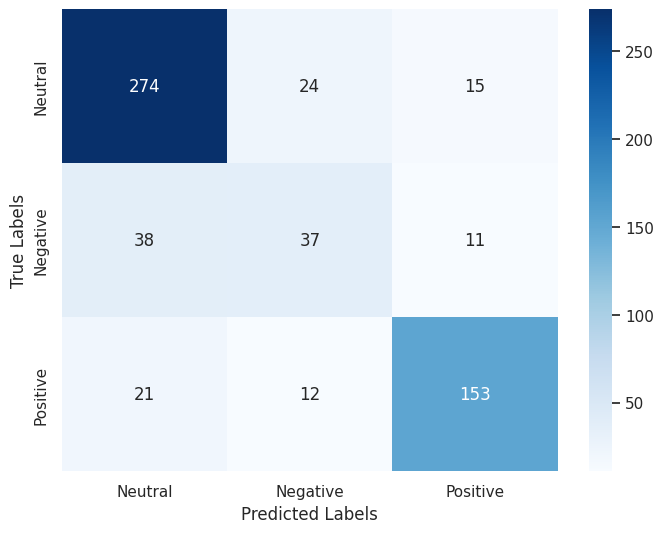

Confusion Matrix:
[[274  24  15]
 [ 38  37  11]
 [ 21  12 153]]
F1 Score: 0.717354061012433

Classification Report:
              precision    recall  f1-score   support

     neutral       0.82      0.88      0.85       313
    negative       0.51      0.43      0.47        86
    positive       0.85      0.82      0.84       186

    accuracy                           0.79       585
   macro avg       0.73      0.71      0.72       585
weighted avg       0.79      0.79      0.79       585



In [ ]:
# Calculate the confusion matrix
true_labels2= dataset_test2['label']    
conf_matrix2 = confusion_matrix(true_labels2, pred_labels2)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(8, 6))
category_names = ['Neutral', 'Negative', 'Positive']
sns.heatmap(conf_matrix2, annot=True, cmap='Blues', fmt='g', xticklabels=category_names, yticklabels=category_names)
plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')
plt.show()


# Calculate the F1 score
f1 = f1_score(true_labels2, pred_labels2, average='macro')

# Print the results
print('Confusion Matrix:')
print(conf_matrix2)
print('F1 Score:', f1)


class_report = classification_report(true_labels2, pred_labels2, target_names=['neutral', 'negative', 'positive'])

print('\nClassification Report:')
print(class_report)

The model achieved an overall accuracy of 79% and a macro F1 score of 0.72, suggesting a balanced performance across different classes. However, the precision and recall varied significantly across the classes, with 'negative' class showing lower values, indicating potential areas for model improvement. The overall strong performance in 'neutral' and 'positive' classes suggests the model's proficiency in sentiment detection.

The code below illustrates the creation of a dual-axis line graph using Python's Matplotlib library. It plots validation loss (in red) and validation accuracy (in blue) against the number of training epochs. The 'eval_loss' and 'eval_accuracy' values are extracted from the 'log_history' of a trainer object, presumably from a machine learning model. This visualization is useful for observing the performance and convergence of the model over time.

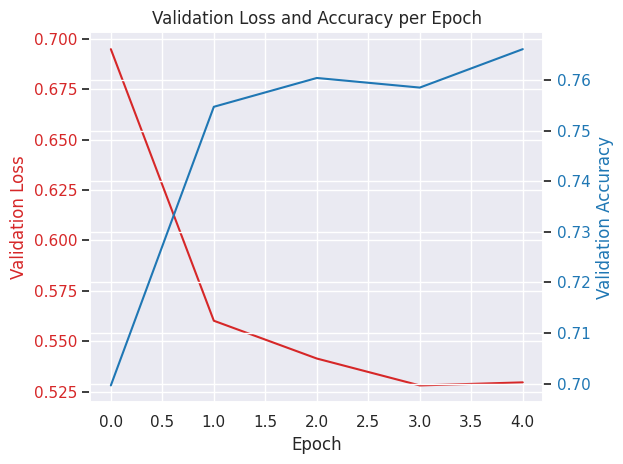

In [ ]:
#Plotting accuracy and loss
val_loss = []
val_accuracy = []
for elem in trainer2.state.log_history:
    if 'eval_loss' in elem.keys():
        val_loss.append(elem['eval_loss'])
        val_accuracy.append(elem['eval_accuracy'])

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Validation Loss', color=color)
ax1.plot(val_loss, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Validation Accuracy', color=color)
ax2.plot(val_accuracy, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Validation Loss and Accuracy per Epoch')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

The graph with validation loss and accuracy is indication that model has been trained well.

### save the fine-tuned model.

This line of code saves the trained model as *'data2_finbert-sentiment'* to the directory "finbert-sentiment". This saved model can be later loaded and used for inference or further training.

In [ ]:
#Save the fine-tuned model.
trainer2.save_model('data2_finbert-sentiment')  
